In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [16]:
co2 = pd.read_csv("C:/Users/HP/Downloads/CO2_emission.csv")
co2.head()

,Model_Year,Make,Model,Vehicle_Class,Engine_Size,Cylinders,Transmission,Fuel_Consumption_in_City(L/100 km),Fuel_Consumption_in_City_Hwy(L/100 km),Fuel_Consumption_comb(L/100km),CO2_Emissions,Smog_Level
0,2021,Acura,ILX,Compact,2.4,4,AM8,9.9,7.0,8.6,199,3
1,2021,Acura,NSX,Two-seater,3.5,6,AM9,11.1,10.8,11.0,256,3
2,2021,Acura,RDX SH-AWD,SUV: Small,2.0,4,AS10,11.0,8.6,9.9,232,6
3,2021,Acura,RDX SH-AWD A-SPEC,SUV: Small,2.0,4,AS10,11.3,9.1,10.3,242,6
4,2021,Acura,TLX SH-AWD,Compact,2.0,4,AS10,11.2,8.0,9.8,230,7


In [17]:
co2['Transmission'].unique()


array(['AM8', 'AM9', 'AS10', 'A8', 'A9', 'M7', 'AM7', 'AS8', 'M6', 'AS6',
       'AV', 'AS9', 'A10', 'A6', 'M5', 'AV7', 'AV1', 'AM6', 'AS7', 'AV8',
       'AV6', 'AV10', 'AS5'], dtype=object)

In [3]:
co2.describe()

,Model_Year,Engine_Size,Cylinders,Fuel_Consumption_in_City(L/100 km),Fuel_Consumption_in_City_Hwy(L/100 km),Fuel_Consumption_comb(L/100km),CO2_Emissions,Smog_Level
count,935.0,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000
mean,2021.0,3.214866,5.716578,12.498610,9.306203,11.060214,258.529412,4.726203
std,0.0,1.388513,1.977359,3.487271,2.215819,2.867028,64.442768,1.712127
min,2021.0,1.000000,3.000000,4.000000,3.900000,4.000000,94.000000,1.000000
25%,2021.0,2.000000,4.000000,10.100000,7.700000,9.100000,213.000000,3.000000
50%,2021.0,3.000000,6.000000,12.000000,9.000000,10.700000,255.000000,5.000000
75%,2021.0,4.000000,8.000000,14.800000,10.800000,13.100000,303.500000,6.000000
max,2021.0,8.000000,16.000000,30.300000,20.900000,26.100000,608.000000,7.000000


In [4]:
co2.shape

(935, 12)

C:\Users\HP\AppData\Local\Temp\ipykernel_6736\2384013116.py:16: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


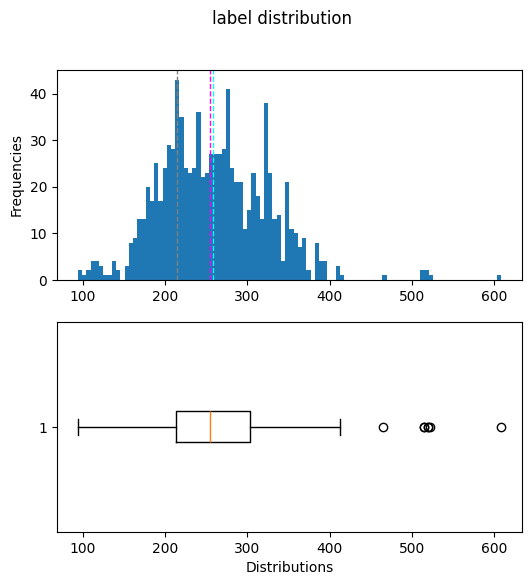

In [5]:
import numpy as np
from sklearn.linear_model import LinearRegression

label = co2['CO2_Emissions']
fig, ax = plt.subplots(2, 1, figsize=(6, 6))
ax[0].hist(label, bins=100)
ax[0].set_ylabel('Frequencies')

ax[0].axvline(x=label.mean(), color='cyan', linestyle='dashed', linewidth=1)
ax[0].axvline(x=label.median(), color='magenta', linestyle='dashed', linewidth=1)
ax[0].axvline(x=label.mode()[0], color='gray', linestyle='dashed', linewidth=1)

ax[1].boxplot(label, vert=False)
ax[1].set_xlabel('Distributions')
plt.suptitle('label distribution')
fig.show()





In [6]:
co2 = co2[co2['CO2_Emissions'] < 450]

C:\Users\HP\AppData\Local\Temp\ipykernel_6736\719419607.py:16: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


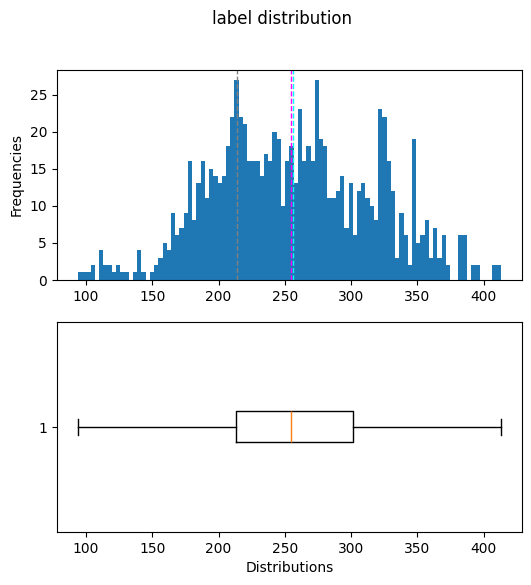

In [7]:
import numpy as np
from sklearn.linear_model import LinearRegression

label = co2['CO2_Emissions']
fig, ax = plt.subplots(2, 1, figsize=(6, 6))
ax[0].hist(label, bins=100)
ax[0].set_ylabel('Frequencies')

ax[0].axvline(x=label.mean(), color='cyan', linestyle='dashed', linewidth=1)
ax[0].axvline(x=label.median(), color='magenta', linestyle='dashed', linewidth=1)
ax[0].axvline(x=label.mode()[0], color='gray', linestyle='dashed', linewidth=1)

ax[1].boxplot(label, vert=False)
ax[1].set_xlabel('Distributions')
plt.suptitle('label distribution')
fig.show()

In [8]:
features = co2[['Engine_Size', 'Cylinders', 'Fuel_Consumption_in_City(L/100 km)', 'Fuel_Consumption_in_City_Hwy(L/100 km)', 'Fuel_Consumption_comb(L/100km)', 'Smog_Level']]

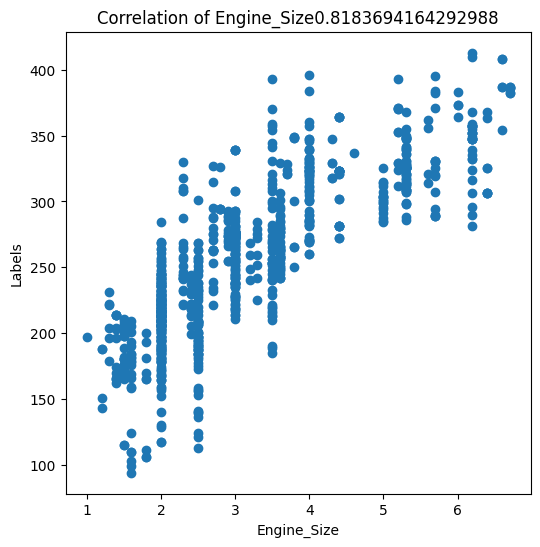

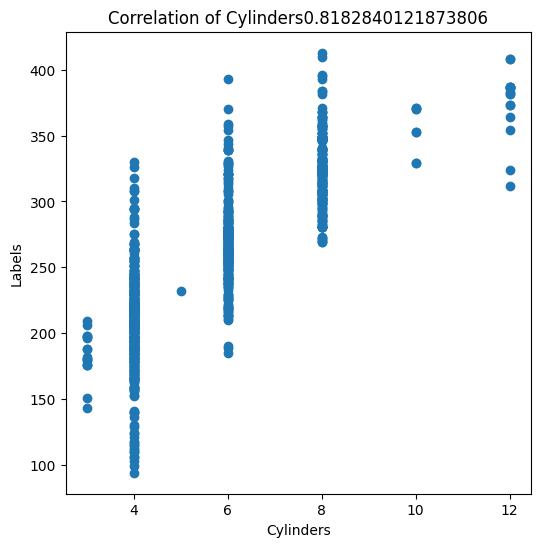

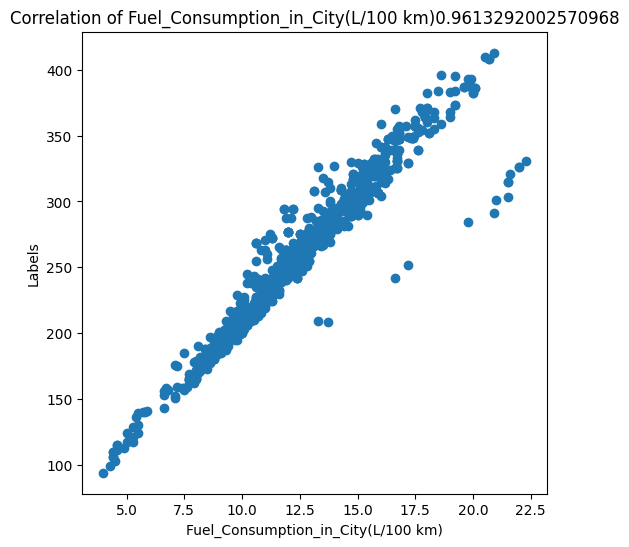

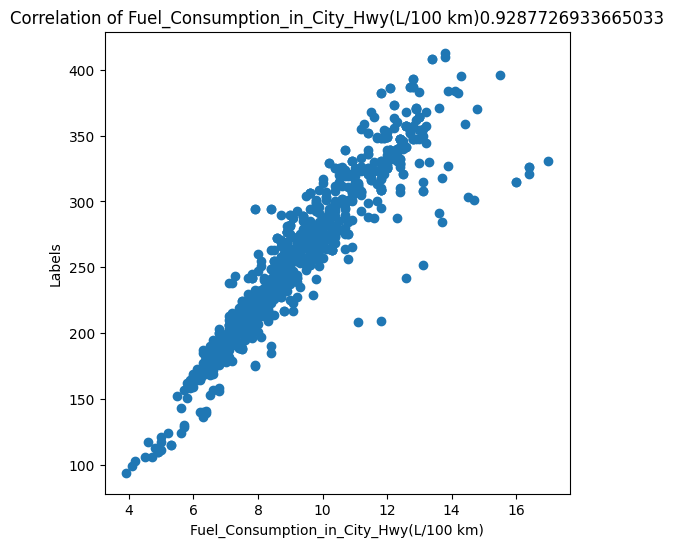

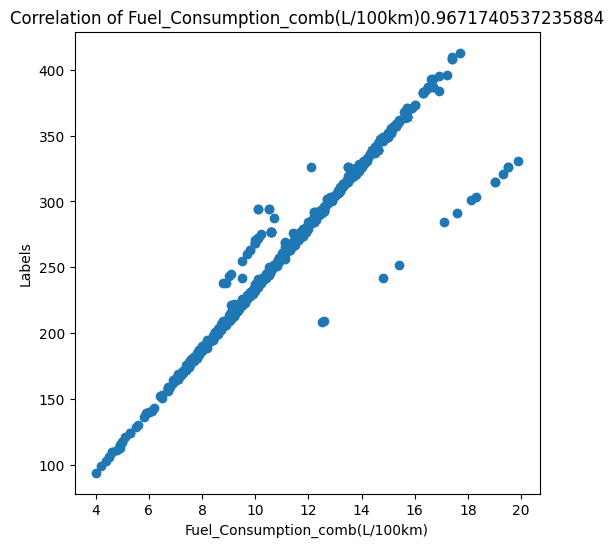

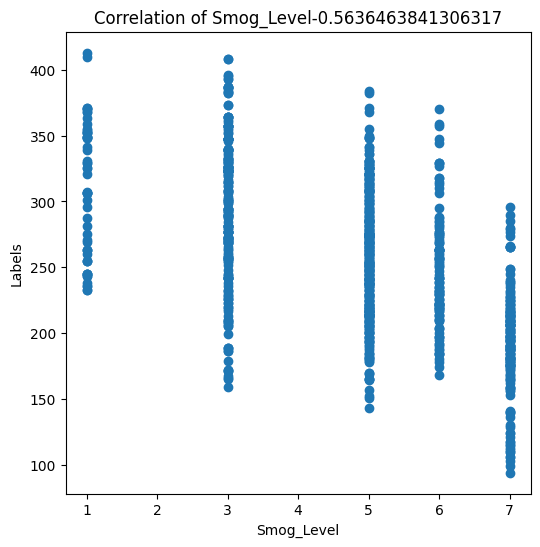

In [9]:
for col in features:
    feature = co2[col]
    fig = plt.figure(figsize=(6, 6))
    correlation = feature.corr(label)
    ax = fig.gca()
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('Labels')
    plt.title('Correlation of ' + col + str(correlation) )
    plt.show()


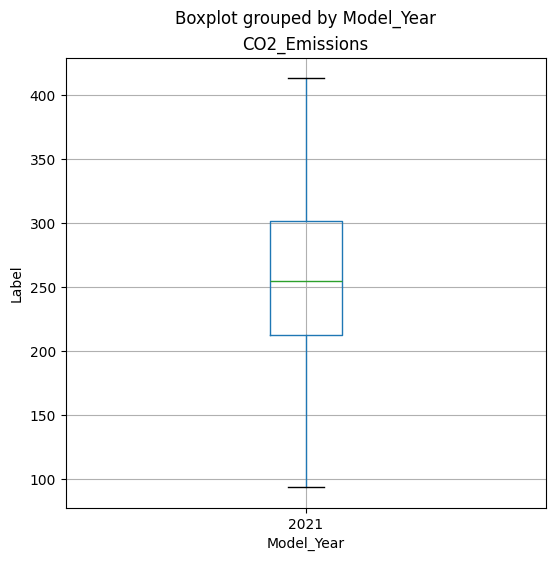

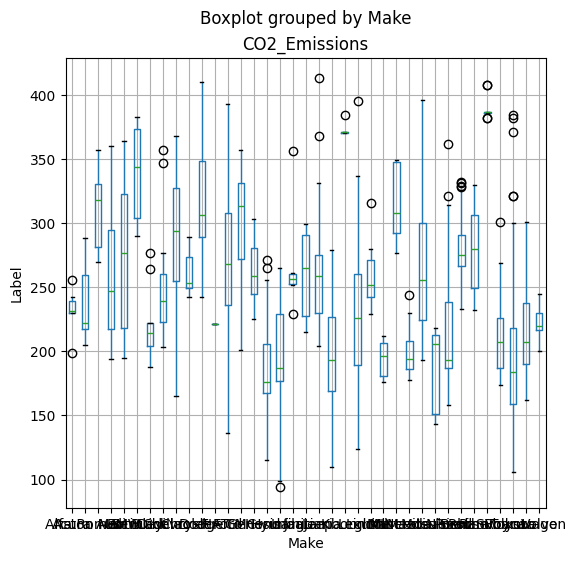

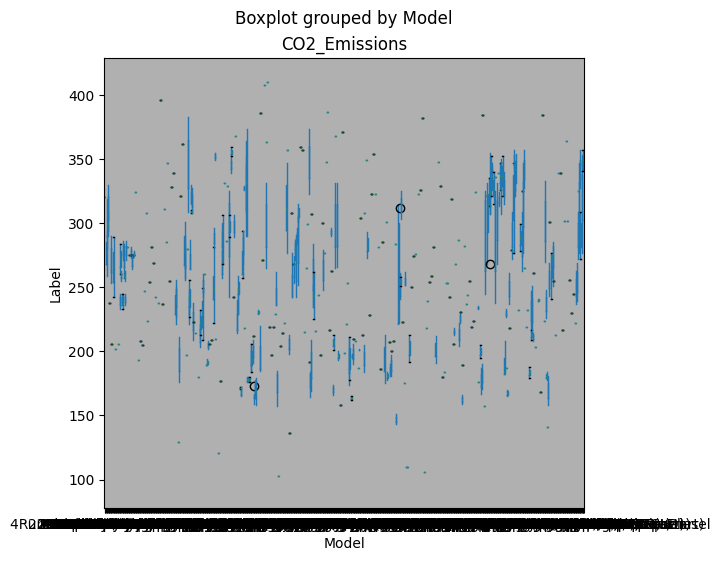

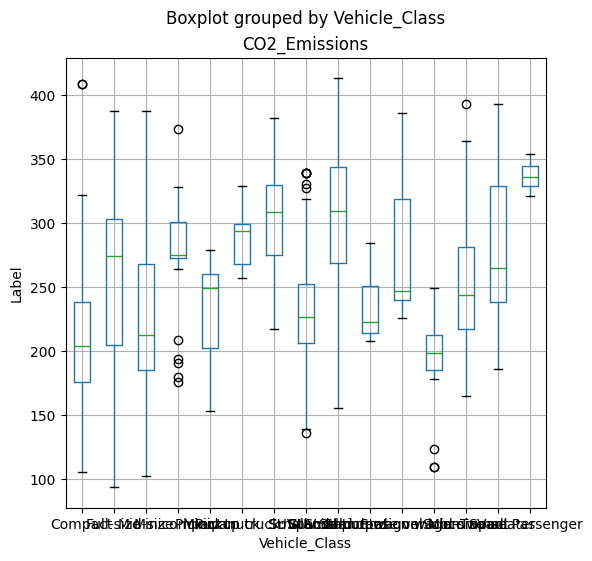

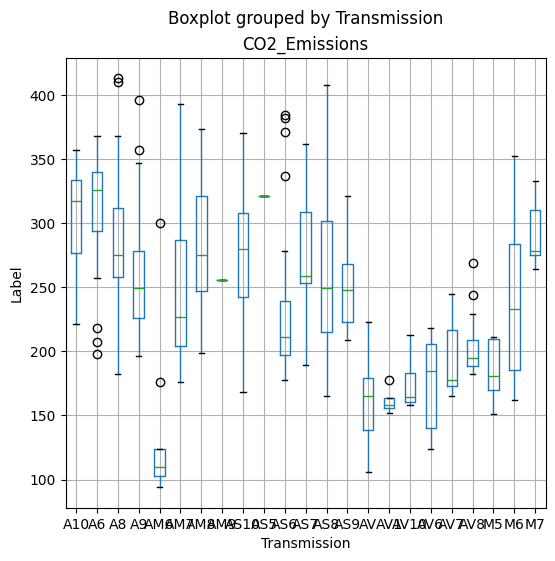

In [10]:
categorical_features = co2[['Model_Year', 'Make', 'Model', 'Vehicle_Class', 'Transmission']]
for col in categorical_features:
    fig = plt.figure(figsize=(6, 6))
    ax = fig.gca()
    co2.boxplot(column='CO2_Emissions', by = col, ax=ax)
    plt.xlabel(col)
    plt.ylabel('Label')
    plt.tight_layout
    plt.show()

    

In [12]:
x = co2[['Model_Year', 'Make', 'Model', 'Vehicle_Class', 'Engine_Size', 'Cylinders', 'Transmission', 'Fuel_Consumption_in_City(L/100 km)', 'Fuel_Consumption_in_City_Hwy(L/100 km)', 'Fuel_Consumption_comb(L/100km)', 'Smog_Level']]
y = co2['CO2_Emissions']
x.shape


(928, 11)

In [13]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [14]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

numeric_features = [4, 5, 7, 8, 9, 10]
numeric_transformer = Pipeline(steps=[('num', StandardScaler())])

categorical_features = [0, 1, 2, 3, 6]
categorical_transformer = Pipeline(steps=[('cat', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(transformers=[('num', numeric_transformer, numeric_features),
                                               ('cat', categorical_transformer, categorical_features)])

pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', RandomForestRegressor())])
model = pipeline.fit(x_train, (y_train))
print(model)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('num',
                                                                   StandardScaler())]),
                                                  [4, 5, 7, 8, 9, 10]),
                                                 ('cat',
                                                  Pipeline(steps=[('cat',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  [0, 1, 2, 3, 6])])),
                ('regressor', RandomForestRegressor())])


MSE:  138.83292043010758
RMSE:  11.782738239904491
Accuracy:  0.9610702618671221


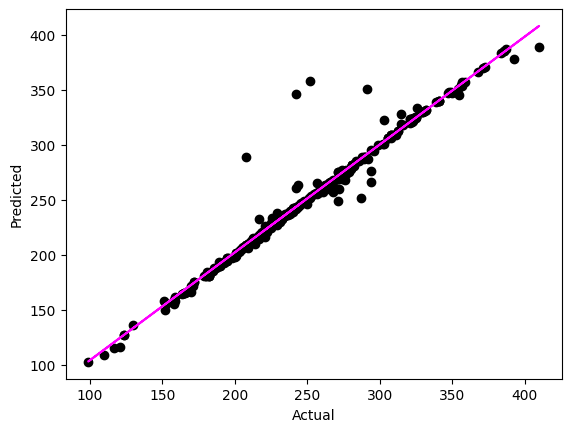

In [15]:
from sklearn.metrics import r2_score, mean_squared_error
pred = model.predict(x_test)
mse = mean_squared_error(y_test, pred)
print('MSE: ', mse)
rmse = np.sqrt(mse)
print('RMSE: ', rmse)

r2 = r2_score(y_test, pred)
print('Accuracy: ', r2)

plt.scatter(x=y_test, y=pred, color='black')
plt.xlabel('Actual')
plt.ylabel('Predicted')

z = np.polyfit(y_test, pred, 1)
p = np.poly1d(z)
plt.plot(y_test, p(y_test), color='magenta')
plt.show()
